In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import make_column_transformer

# Dataset Overview: Agricultural Production and Environmental Factors

This dataset contains **28,242 entries** with **seven columns**, representing various features related to agricultural production and environmental factors across different countries (referred to as "Area").

## Dataset Columns

- **Area (Country)**: 
  - Data type: `Categorical (object)`
  - Description: Contains categorical data representing different countries or regions. There are no missing values.

- **Item**: 
  - Data type: `Categorical (object)`
  - Description: Lists the type of agricultural product being analyzed. The data in this column indicates which crop or item is being studied.

- **Year**: 
  - Data type: `Integer`
  - Description: Indicates the year for which the data was recorded. It covers a range of years and tracks changes over time.

- **hg/ha_yield**: 
  - Data type: `Integer`
  - Description: Represents crop yield in hectograms per hectare (hg/ha). This is a key performance indicator of agricultural productivity.

- **average_rain_fall_mm_per_year**: 
  - Data type: `Float`
  - Description: Measures the average annual rainfall in millimeters for each country. Rainfall is a crucial factor affecting crop yields.

- **pesticides_tonnes**: 
  - Data type: `Float`
  - Description: Represents the amount of pesticides used, measured in tonnes. The use of pesticides can impact crop yields, though excessive use may have environmental and health repercussions.

- **avg_temp**: 
  - Data type: `Float`
  - Description: Represents the average temperature in degrees Celsius for each country during the respective year. Temperature is another significant factor that influences agricultural productivity.


In [2]:
data = pd.read_csv("yield_df.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [4]:
data.head(20)

Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0            0  Albania        Maize  1990        36613   
1            1  Albania     Potatoes  1990        66667   
2            2  Albania  Rice, paddy  1990        23333   
3            3  Albania      Sorghum  1990        12500   
4            4  Albania     Soybeans  1990         7000   
5            5  Albania        Wheat  1990        30197   
6            6  Albania        Maize  1991        29068   
7            7  Albania     Potatoes  1991        77818   
8            8  Albania  Rice, paddy  1991        28538   
9            9  Albania      Sorghum  1991         6667   
10          10  Albania     Soybeans  1991         6066   
11          11  Albania        Wheat  1991        20698   
12          12  Albania        Maize  1992        24876   
13          13  Albania     Potatoes  1992        82920   
14          14  Albania  Rice, paddy  1992        40000   
15          15  Albania      Sorghum  1992         3747   
16          16  Albania     Soybeans  1992         4507   
17          17  Albania        Wheat  1992        24388   
18          18  Albania        Maize  1993        24185   
19          19  Albania     Potatoes  1993        98446   

    average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                          1485.0              121.0     16.37  
1                          1485.0              121.0     16.37  
2                          1485.0              121.0     16.37  
3                          1485.0              121.0     16.37  
4                          1485.0              121.0     16.37  
5                          1485.0              121.0     16.37  
6                          1485.0              121.0     15.36  
7                          1485.0              121.0     15.36  
8                          1485.0              121.0     15.36  
9                          1485.0              121.0     15.36  
10                         1485.0              121.0     15.36  
11                         1485.0              121.0     15.36  
12                         1485.0              121.0     16.06  
13                         1485.0              121.0     16.06  
14                         1485.0              121.0     16.06  
15                         1485.0              121.0     16.06  
16                         1485.0              121.0     16.06  
17                         1485.0              121.0     16.06  
18                         1485.0              121.0     16.05  
19                         1485.0              121.0     16.05

In [5]:
data = data.drop(columns = "Unnamed: 0").copy()

# Data Visualization

In [6]:

data_group_Area= data.groupby(['Area', 'Item']).agg({'hg/ha_yield': 'mean'})
data_group_Area.reset_index(inplace = True)

In [7]:
data_group_Area

Area            Item    hg/ha_yield
0     Albania           Maize   42664.782609
1     Albania        Potatoes  153105.043478
2     Albania     Rice, paddy   33414.250000
3     Albania         Sorghum    7638.000000
4     Albania        Soybeans   14175.043478
..        ...             ...            ...
593  Zimbabwe     Rice, paddy   22655.000000
594  Zimbabwe         Sorghum    3864.956522
595  Zimbabwe        Soybeans   17265.695652
596  Zimbabwe  Sweet potatoes   21368.521739
597  Zimbabwe           Wheat   43743.043478

[598 rows x 3 columns]

In [8]:
def graficarBarras_Area(area):
    fig = px.bar(
        data_group_Area[data_group_Area["Area"]== area], 
        x='Item', 
        y='hg/ha_yield', 
        title="Albania - Yield per Item", 
        labels={'hg/ha_yield_mean': 'Yield (hg/ha)'},
        color_discrete_sequence=["purple"]  # Color de las barras
    )

    # Personalizar el fondo negro
    fig.update_layout(
        plot_bgcolor='black',  # Fondo de la gráfica
        paper_bgcolor='black',  # Fondo del papel
        font_color='white'      # Color del texto
    )

    # Mostrar el gráfico
    fig.show()

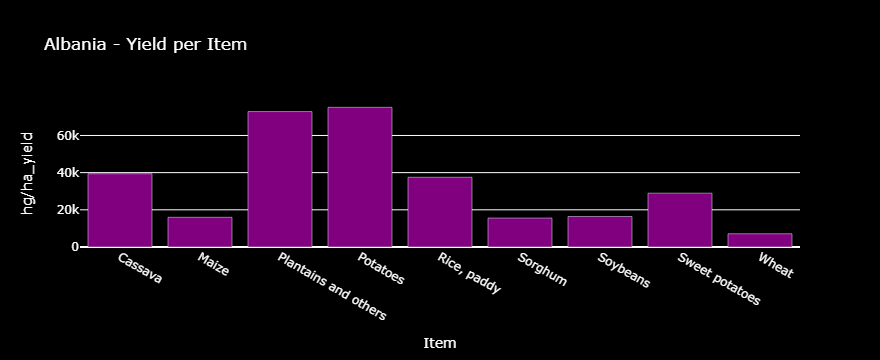

In [9]:
graficarBarras_Area("Ecuador")

<AxesSubplot: xlabel='hg/ha_yield', ylabel='Density'>

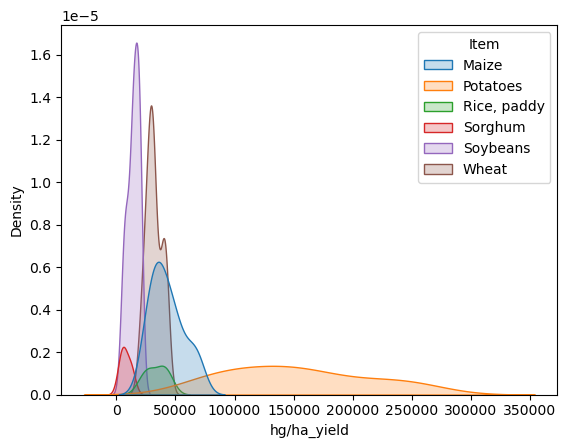

In [10]:
sns.kdeplot(data[data["Area"]=="Albania"], x="hg/ha_yield",hue="Item",fill =True)

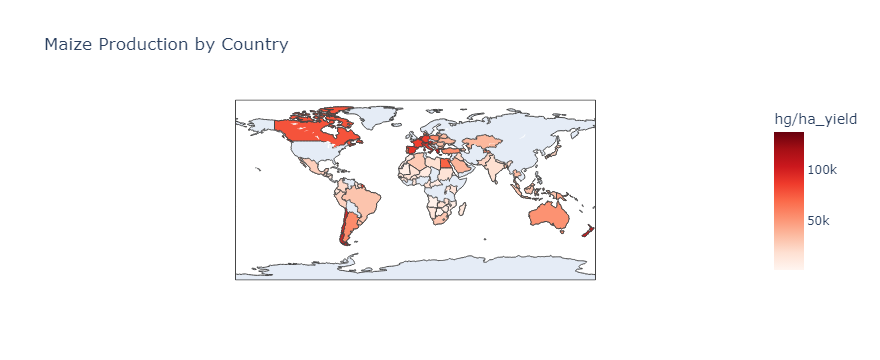

In [11]:
# Crear el heatmap en un mapa mundial con la columna de producción como referencia de color
fig = px.choropleth(
    data_group_Area[data_group_Area["Item"] == "Maize"],  # Filtrar solo datos de Maíz
    locations="Area",  # Columna de países
    locationmode="country names",  # El modo para ubicar por nombres de países
    color="hg/ha_yield",  # Usar la columna de producción para definir los colores
    hover_name="Area",  # Información al pasar el ratón
    color_continuous_scale="Reds",  # Escala de color donde el rojo más intenso indica mayor producción
    title="Maize Production by Country"
)

# Mostrar el gráfico
fig.show()


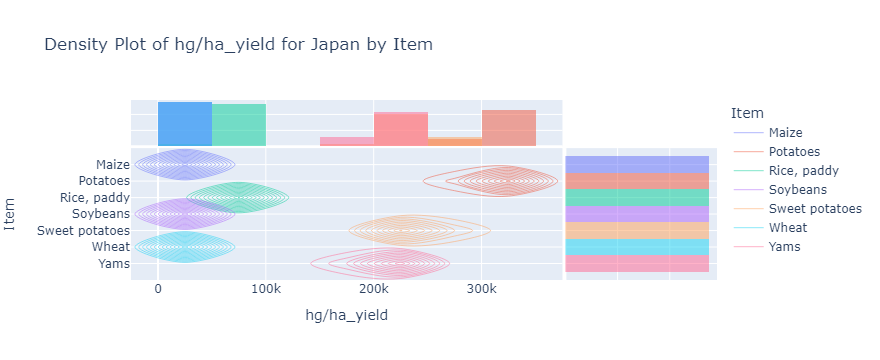

In [12]:

area = "Japan"  # Cambia el nombre del área según tus datos
data_filtrada = data[data['Area'] == area]

# Crear gráfico de contornos de densidad
fig = px.density_contour(
    data_filtrada, 
    x="hg/ha_yield", 
    y="Item", 
    color="Item", 
    title=f"Density Plot of hg/ha_yield for {area} by Item",
    marginal_x="histogram",
    marginal_y="histogram"
)

# Rellenar las áreas bajo las curvas
fig.update_traces( )

# Mostrar el gráfico
fig.show()

In [13]:
data_group_Area= data.groupby(['Area', 'Item']).agg({'hg/ha_yield': 'mean'})
data_group_Area.reset_index(inplace = True)

# Analisis EDA

In [14]:
data

Area            Item  Year  hg/ha_yield  \
0       Albania           Maize  1990        36613   
1       Albania        Potatoes  1990        66667   
2       Albania     Rice, paddy  1990        23333   
3       Albania         Sorghum  1990        12500   
4       Albania        Soybeans  1990         7000   
...         ...             ...   ...          ...   
28237  Zimbabwe     Rice, paddy  2013        22581   
28238  Zimbabwe         Sorghum  2013         3066   
28239  Zimbabwe        Soybeans  2013        13142   
28240  Zimbabwe  Sweet potatoes  2013        22222   
28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2                             1485.0             121.00     16.37  
3                             1485.0             121.00     16.37  
4                             1485.0             121.00     16.37  
...                              ...                ...       ...  
28237                          657.0            2550.07     19.76  
28238                          657.0            2550.07     19.76  
28239                          657.0            2550.07     19.76  
28240                          657.0            2550.07     19.76  
28241                          657.0            2550.07     19.76  

[28242 rows x 7 columns]

In [15]:
data.nunique()

Area                               101
Item                                10
Year                                23
hg/ha_yield                      11514
average_rain_fall_mm_per_year      100
pesticides_tonnes                 1673
avg_temp                          1831
dtype: int64

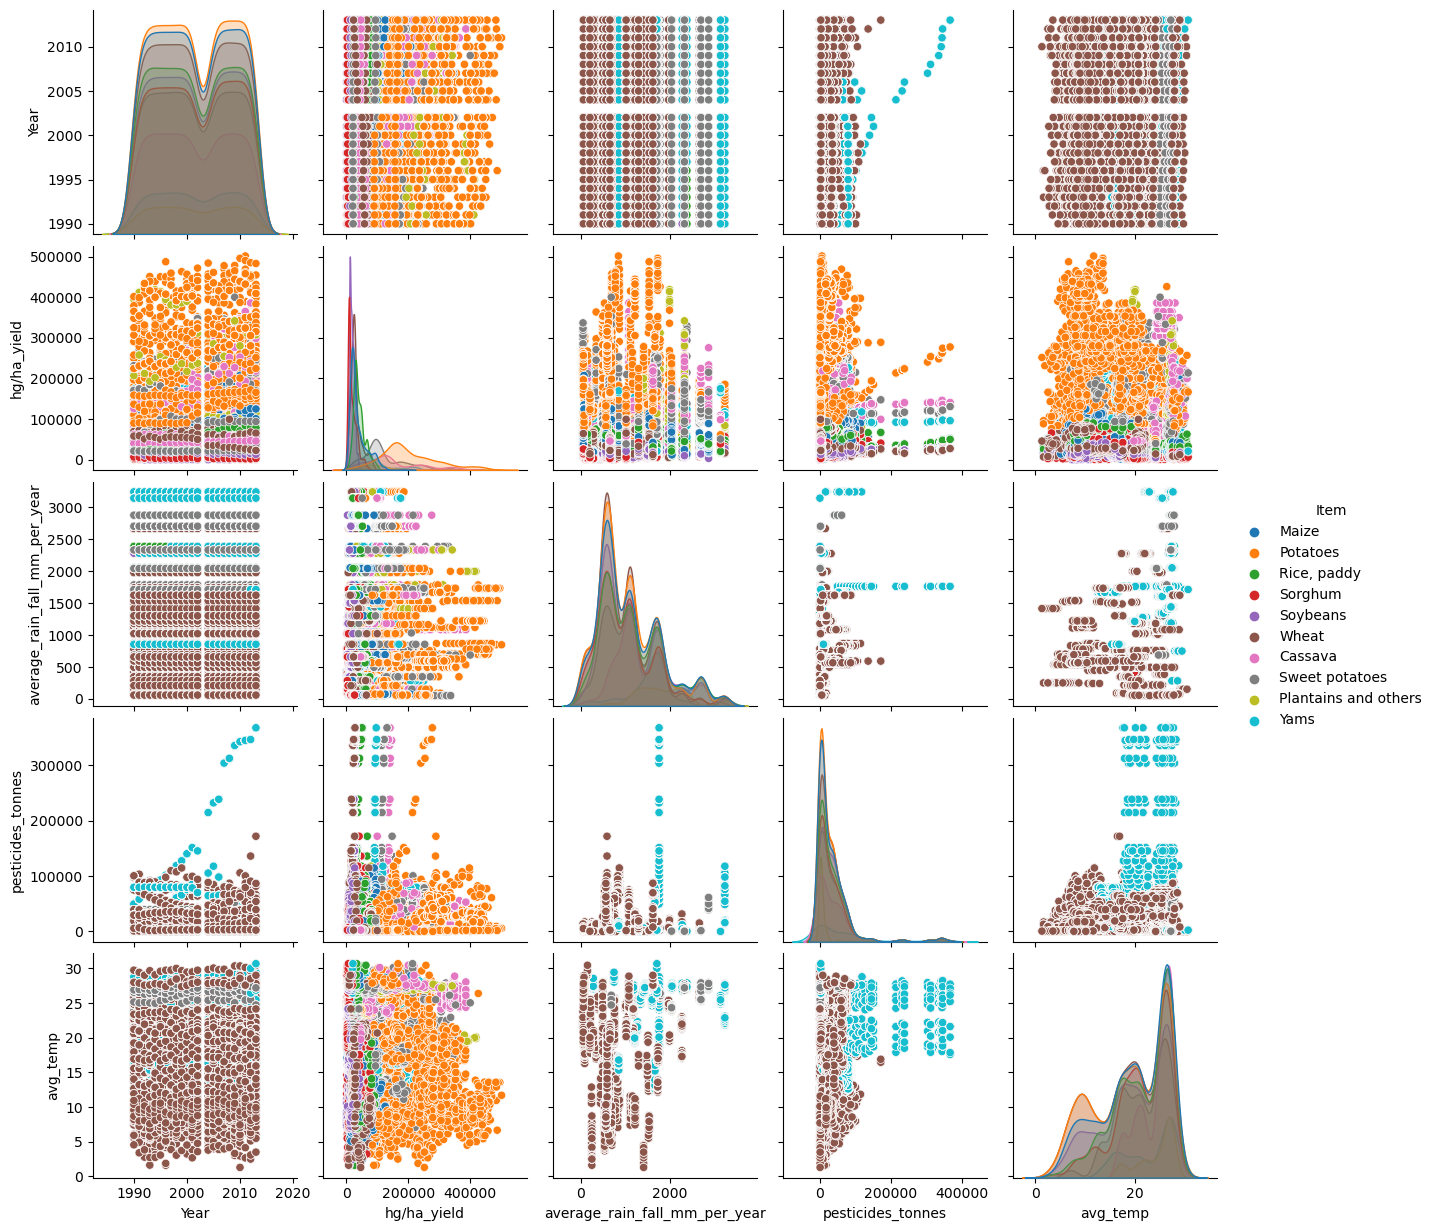

In [16]:
sns.pairplot(data,hue="Item")

# Modelado con RandomForest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Crear un objeto LabelEncoder

le = LabelEncoder()
data["Area"] = le.fit_transform(data['Area'])
data["Item"] = le.fit_transform(data['Item'])

X= data.drop(columns = "hg/ha_yield")
y = data["hg/ha_yield"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Crear y entrenar el modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

In [72]:

# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = 100 * (abs((y_test - y_pred) / y_test)).mean()

# Imprimir resultados
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MSE: 103668278.62397456
RMSE: 10181.762058896022
R²: 0.9857081655966298


C:\Users\falen\anaconda3\envs\ambient_prueba\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [73]:
## Busqueda de los mejores hiperparametros con RandomForest

In [74]:

from sklearn.model_selection import GridSearchCV

# Crear el modelo base
rf = RandomForestRegressor()

# Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 500],                # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],                # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],                # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],                  # Número mínimo de muestras en una hoja
    'max_features': ['auto', 'sqrt', 'log2'],       # Número de características a considerar en cada división
    'bootstrap': [True, False]                      # Si se utiliza el muestreo con reemplazo
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustar el modelo a los datos (X_train e y_train deben estar definidos)
grid_search.fit(X_train, y_train)

# Ver los mejores hiperparámetros encontrados
print("Mejores parámetros encontrados:", grid_search.best_params_)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


C:\Users\falen\anaconda3\envs\ambient_prueba\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
408 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\falen\anaconda3\envs\ambient_prueba\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\falen\anaconda3\envs\ambient_prueba\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\falen\anaconda3\envs\ambient_prueba\lib\site-packages\sklearn\base.py", line 666, in _validate_params
 

Mejores parámetros encontrados: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [75]:

best_params = grid_search.best_params_

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Crear el modelo con los mejores hiperparámetros
best_model = RandomForestRegressor(**best_params)

# Entrenar el modelo con los mejores hiperparámetros en los datos de entrenamiento
best_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = best_model.predict(X_test)  #

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print(f'MSE del modelo: {mse:.2f}')
print(f'RMSE del modelo: {rmse:.2f}')
print(f'MAE del modelo: {mae:.2f}')
print(f'R² del modelo: {r2:.2f}')

MSE del modelo: 138951949.56
RMSE del modelo: 11787.79
MAE del modelo: 5699.46
R² del modelo: 0.98


C:\Users\falen\anaconda3\envs\ambient_prueba\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  int32  
 1   Item                           28242 non-null  int32  
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int32(2), int64(2)
memory usage: 1.3 MB


# Usamos PIPELINE para no modificar nuestro DATASET , asi el cliente podrá usarlo en produccion sin estar encodeado

In [21]:
data = pd.read_csv("yield_df.csv")
data = data.drop(columns = "Unnamed: 0").copy()
X= data.drop(columns = "hg/ha_yield")
y = data["hg/ha_yield"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import set_config
set_config(display="diagram")
cat_features = ["Area","Item"]
num_features = ["Year","average_rain_fall_mm_per_year","pesticides_tonnes","avg_temp"]

#creo pileline para las variables numericas
numeric_transformer = Pipeline(
                      steps=[("imputer", SimpleImputer(strategy="mean",add_indicator= False)), 
                             ("scaler", StandardScaler())]
                      )
#creo pileline para las variables categóricas
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)


# rear un objeto utilizando la clase ColumnTransformer que nos permite realizar transformaciones en las columnas, que justamente es lo que buscamos
column_processor = ColumnTransformer(
    transformers=[
        ("numéricas", numeric_transformer, num_features),
        ("categóricas", categorical_transformer, cat_features),
    ]
)


In [79]:


# Crea el modelo con los mejores hiperparámetros
best_model = RandomForestRegressor(**best_params)

# Crea el pipeline completo con preprocesamiento y modelo
pipeline_RF = Pipeline(steps=[("preprocessor", column_processor), ("Clasificacion", best_model)])

# Entrena el modelo con los mejores hiperparámetros en los datos de entrenamiento
pipeline_RF.fit(X_train, y_train)
# Realiza predicciones en los datos de prueba
y_pred = pipeline_RF.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print(f'MSE del modelo: {mse:.2f}')
print(f'RMSE del modelo: {rmse:.2f}')
print(f'MAE del modelo: {mae:.2f}')
print(f'R² del modelo: {r2:.2f}')

MSE del modelo: 87963603.78
RMSE del modelo: 9378.89
MAE del modelo: 3785.96
R² del modelo: 0.99


C:\Users\falen\anaconda3\envs\ambient_prueba\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [80]:
import pickle
# Guardar el modelo en un archivo
with open('pipeline_RF.pkl', 'wb') as file:
    pickle.dump(pipeline_RF, file)

In [ ]:
############# estamos aquie para sacar model cno xgbregressor


In [22]:
from sklearn import set_config
set_config(display="diagram")
cat_features = ["Area","Item"]
num_features = ["Year","average_rain_fall_mm_per_year","pesticides_tonnes","avg_temp"]

#creo pileline para las variables numericas
numeric_transformer = Pipeline(
                      steps=[("imputer", SimpleImputer(strategy="mean",add_indicator= False)), 
                             ("scaler", StandardScaler())]
                      )
#creo pileline para las variables categóricas
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)


# rear un objeto utilizando la clase ColumnTransformer que nos permite realizar transformaciones en las columnas, que justamente es lo que buscamos
column_processor = ColumnTransformer(
    transformers=[
        ("numéricas", numeric_transformer, num_features),
        ("categóricas", categorical_transformer, cat_features),
    ]
)


In [52]:
from sklearn.tree import DecisionTreeRegressor
xgb = DecisionTreeRegressor() 
# Crea el pipeline completo con preprocesamiento y modelo
pipeline_RF = Pipeline(steps=[("preprocessor", column_processor), ("Clasificacion", xgb)])

# Entrena el modelo con los mejores hiperparámetros en los datos de entrenamiento
pipeline_RF.fit(X_train, y_train)
# Realiza predicciones en los datos de prueba
y_pred = pipeline_RF.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print(f'MSE del modelo: {mse:.2f}')
print(f'RMSE del modelo: {rmse:.2f}')
print(f'MAE del modelo: {mae:.2f}')
print(f'R² del modelo: {r2:.2f}')

MSE del modelo: 151306099.63
RMSE del modelo: 12300.65
MAE del modelo: 3686.90
R² del modelo: 0.98


C:\Users\falen\anaconda3\envs\ambient_prueba\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [53]:
import pickle
# Guardar el modelo en un archivo
with open('pipeline_xgb.pkl', 'wb') as file:
    pickle.dump(pipeline_RF, file)

In [54]:
import numpy as np

In [55]:
data = pd.read_csv("yield_df.csv")
data = data.drop(columns = "Unnamed: 0").copy()
X= data.drop(columns = "hg/ha_yield")
y = data["hg/ha_yield"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
with open('pipeline_xgb.pkl', 'rb') as file:
    model = pickle.load(file)

y_pred = model.predict(X_test)
# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [56]:
y_pred

array([ 71228.,  26667.,  51206., ..., 252775.,  24615.,  23187.])

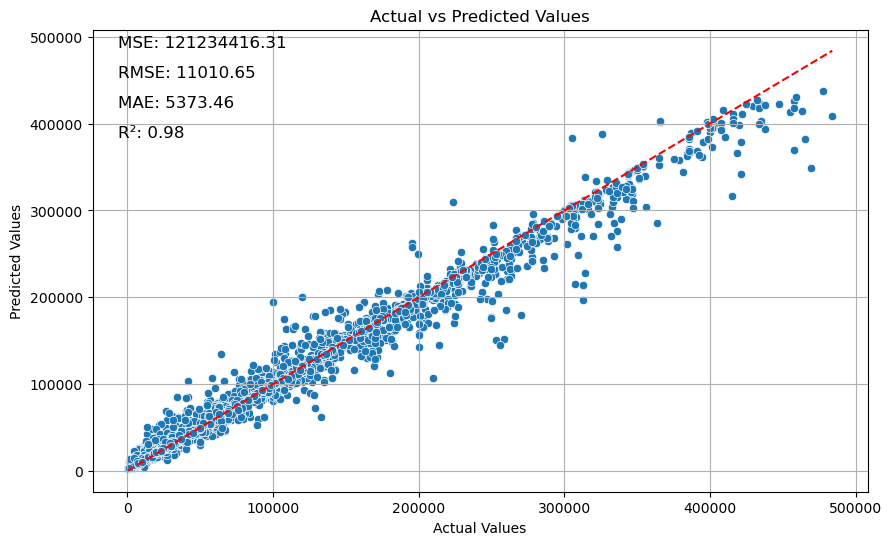

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_predictions_vs_actuals(y_true, y_pred):
    """
    Plots the relationship between actual and predicted values and calculates evaluation metrics.

    Parameters:
    y_true (array-like): Actual values.
    y_pred (array-like): Predicted values by the Random Forest model.
    """

    # Calcular métricas de evaluación
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Crear el gráfico de dispersión
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_true, y=y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # línea 1:1
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.grid(True)

    # Mostrar las métricas en el gráfico
    plt.figtext(0.15, 0.85, f'MSE: {mse:.2f}', fontsize=12)
    plt.figtext(0.15, 0.80, f'RMSE: {rmse:.2f}', fontsize=12)
    plt.figtext(0.15, 0.75, f'MAE: {mae:.2f}', fontsize=12)
    plt.figtext(0.15, 0.70, f'R²: {r2:.2f}', fontsize=12)

    plt.show()

# Uso de la función
# y_true = [...]  # Tus valores reales
# y_pred = [...]  # Tus predicciones del modelo Random Forest
plot_predictions_vs_actuals(y_test, y_pred)

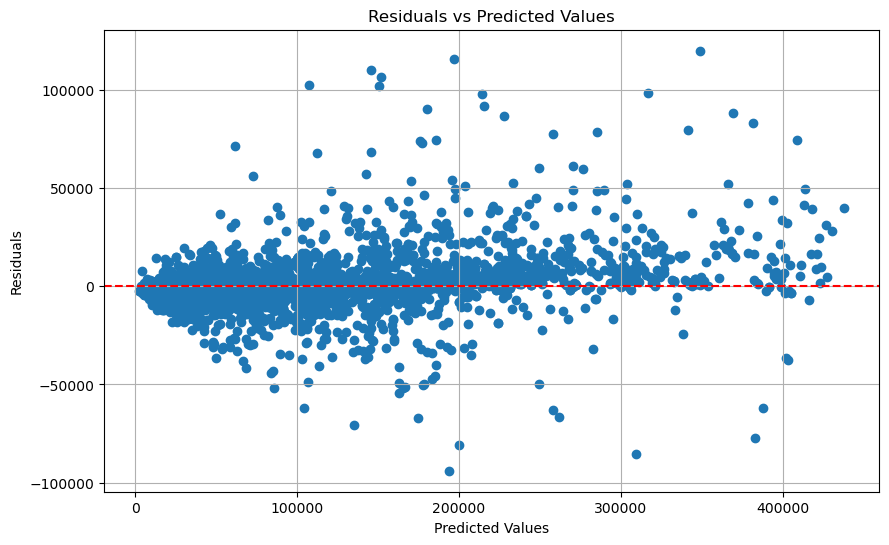

In [82]:
def plot_residuals(y_true, y_pred):
    """
    Plots the residuals of the model predictions.

    Parameters:
    y_true (array-like): Actual values.
    y_pred (array-like): Predicted values by the model.
    """
    residuals = y_true - y_pred

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')  # Línea horizontal en 0
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Values')
    plt.grid(True)
    plt.show()

# Uso de la función
plot_residuals(y_test, y_pred)